In [1]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 1. Read and split dataset


## Read

In [2]:
df = pd.read_csv('../clean_data/clean_apple.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Close+1'] = df['Close'].shift(-1)
df[['Close', 'Close+1']].tail(2)
df = df.drop(columns=[ 'tema_2', 'tema_8'])
df.dropna()


,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_100,Close+1
Date,,,,,,,,,,,,,,,,,,,,,
1981-05-06 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,18950400,1.732413,13.797179,34.412223,-100.000000,-3.524019,...,0.094021,0.096697,0.099374,5.536127,0.149543,0.094821,0.098285,0.095038,0.096726,0.096120
1981-05-07 00:00:00-04:00,0.096120,0.096553,0.096120,0.096120,9363200,1.755353,41.587538,28.006879,0.000723,-1.769775,...,0.093999,0.096120,0.098241,4.413220,0.500002,0.094821,0.097852,0.096337,0.096691,0.096986
1981-05-08 00:00:00-04:00,0.096986,0.097419,0.096986,0.096986,7907200,1.539442,55.827769,22.867958,87.499635,-0.444408,...,0.094197,0.095976,0.097755,3.707703,0.783887,0.094821,0.097419,0.097203,0.096708,0.094821
1981-05-11 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,11939200,1.928778,29.164919,28.873056,-100.000000,0.000000,...,0.094197,0.095976,0.097755,3.707703,0.175557,0.094821,0.097419,0.095038,0.096597,0.094821
1981-05-12 00:00:00-04:00,0.094821,0.096120,0.094821,0.094821,4256000,1.649274,29.164919,22.462062,-39.285796,-1.351279,...,0.093502,0.095543,0.097584,4.272298,0.323223,0.094821,0.097419,0.095471,0.096492,0.094388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,189.080002,190.070007,188.940002,189.589996,46347300,0.990360,82.130415,70.421457,74.977544,2.331728,...,187.654737,188.966665,190.278593,1.388529,0.737563,185.669998,190.070007,189.505005,187.927439,193.970001
2023-06-30 00:00:00-04:00,191.630005,194.479996,191.259995,193.970001,85069600,1.744503,93.782080,78.988970,100.000000,3.142616,...,186.637909,190.936666,195.235423,4.502809,0.852815,187.600006,194.479996,192.869995,188.790908,192.460007
2023-07-03 00:00:00-04:00,193.779999,193.880005,191.759995,192.460007,31458200,1.453242,70.134070,84.700645,38.282485,1.696173,...,188.373397,192.006668,195.639939,3.784526,0.562387,188.940002,194.479996,192.820000,189.524958,191.330002


## SPLIT DATASET 

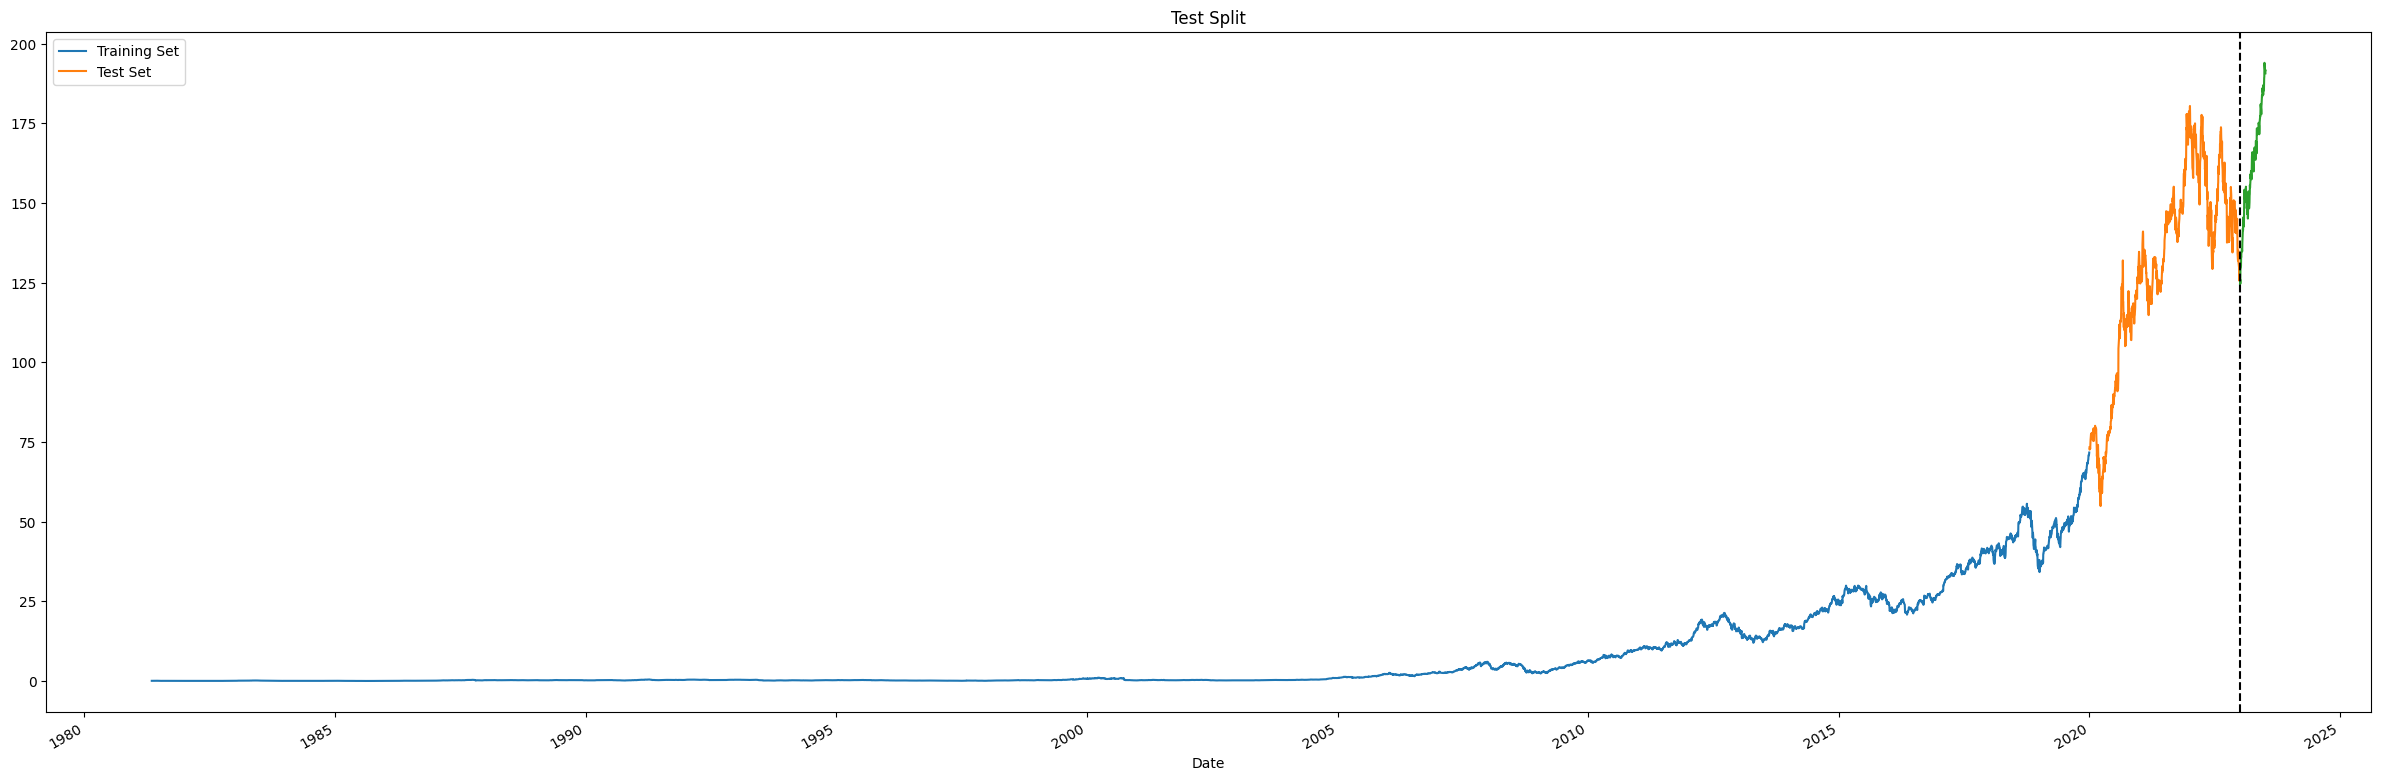

In [3]:
train = df.loc[(df.index < pd.to_datetime('2020-01-01 00:00:00-04:00'))]
test = df.loc[(df.index >= pd.to_datetime('2020-01-01 00:00:00-04:00')) & (df.index < pd.to_datetime('2023-01-01 00:00:00-04:00'))]
test_last = df.loc[df.index >=  pd.to_datetime('2023-01-01 00:00:00-04:00')]

fig, ax = plt.subplots(figsize=(30, 10))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

test_last['Close'].plot(ax=ax, label='val Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
# plt.show()

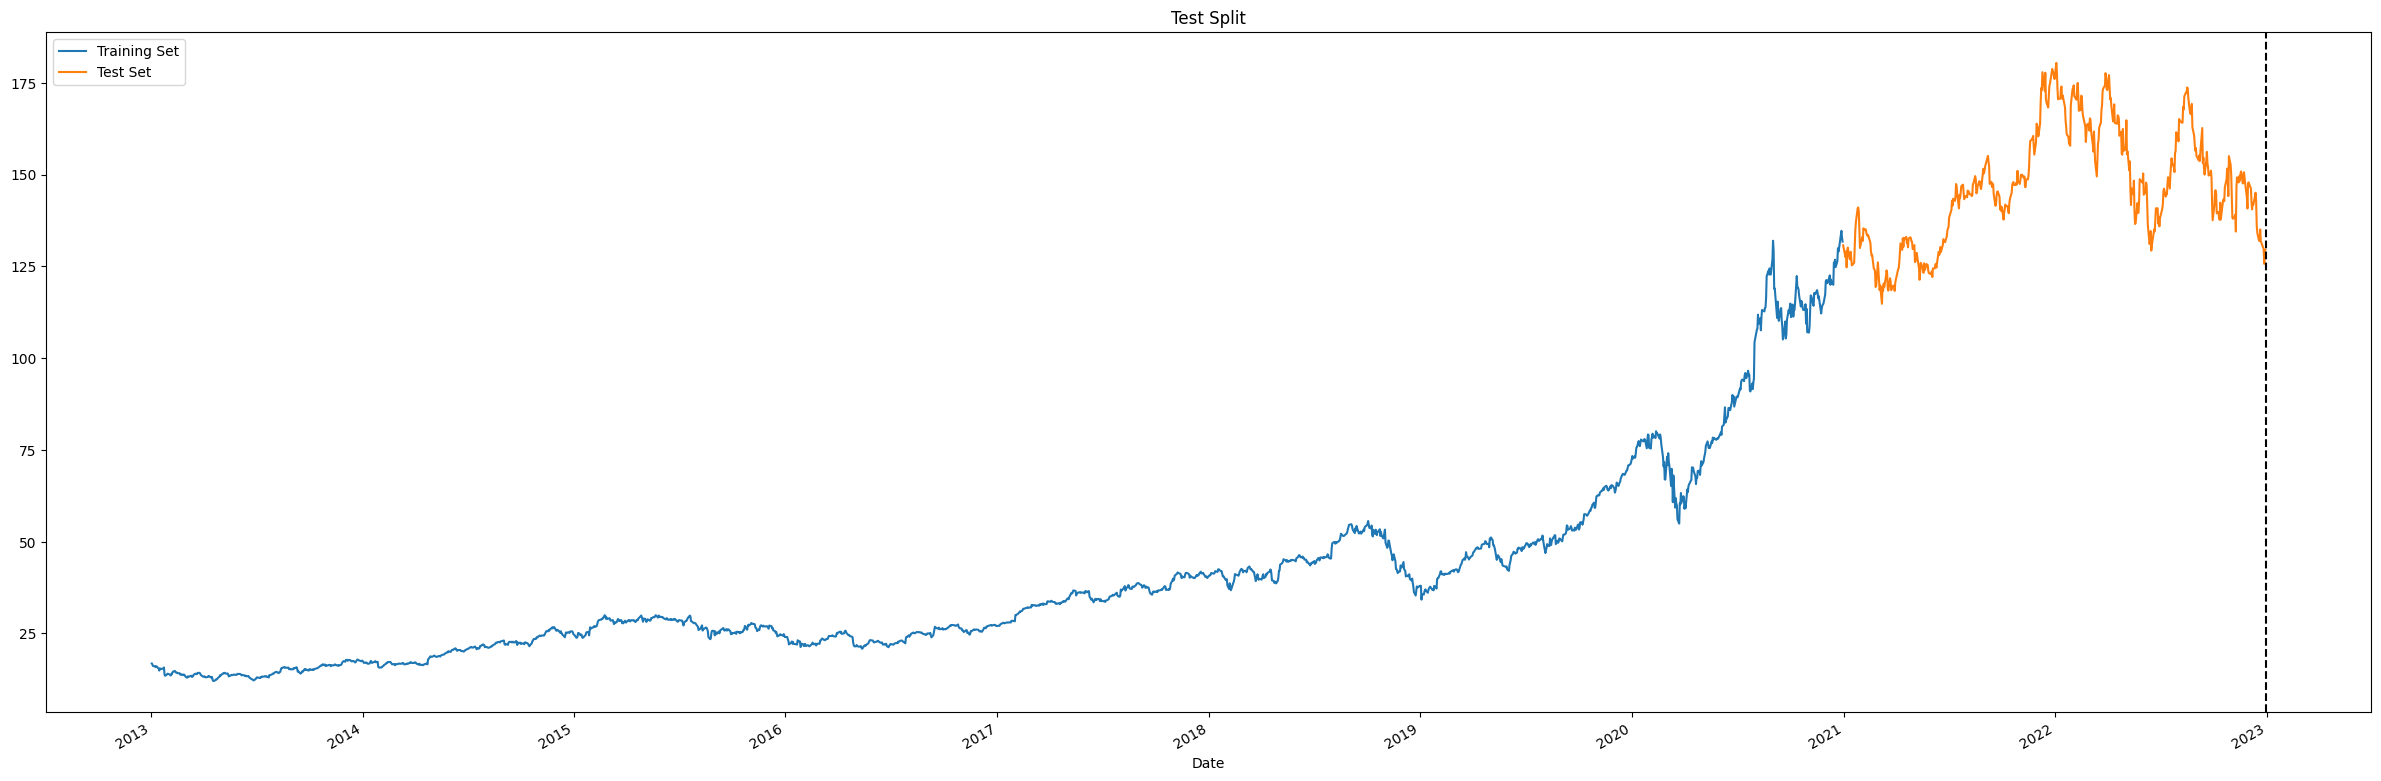

In [4]:
temp_df = df.loc[ pd.to_datetime('2013-01-01 00:00:00-04:00'): pd.to_datetime('2022-12-31 00:00:00-04:00')]
# pd.to_datetime('2023-01-01 00:00:00-04:00')
train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)

train = temp_df[:train_size]
test= temp_df[train_size:]

fig, ax = plt.subplots(figsize=(30, 10))

train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## cross val

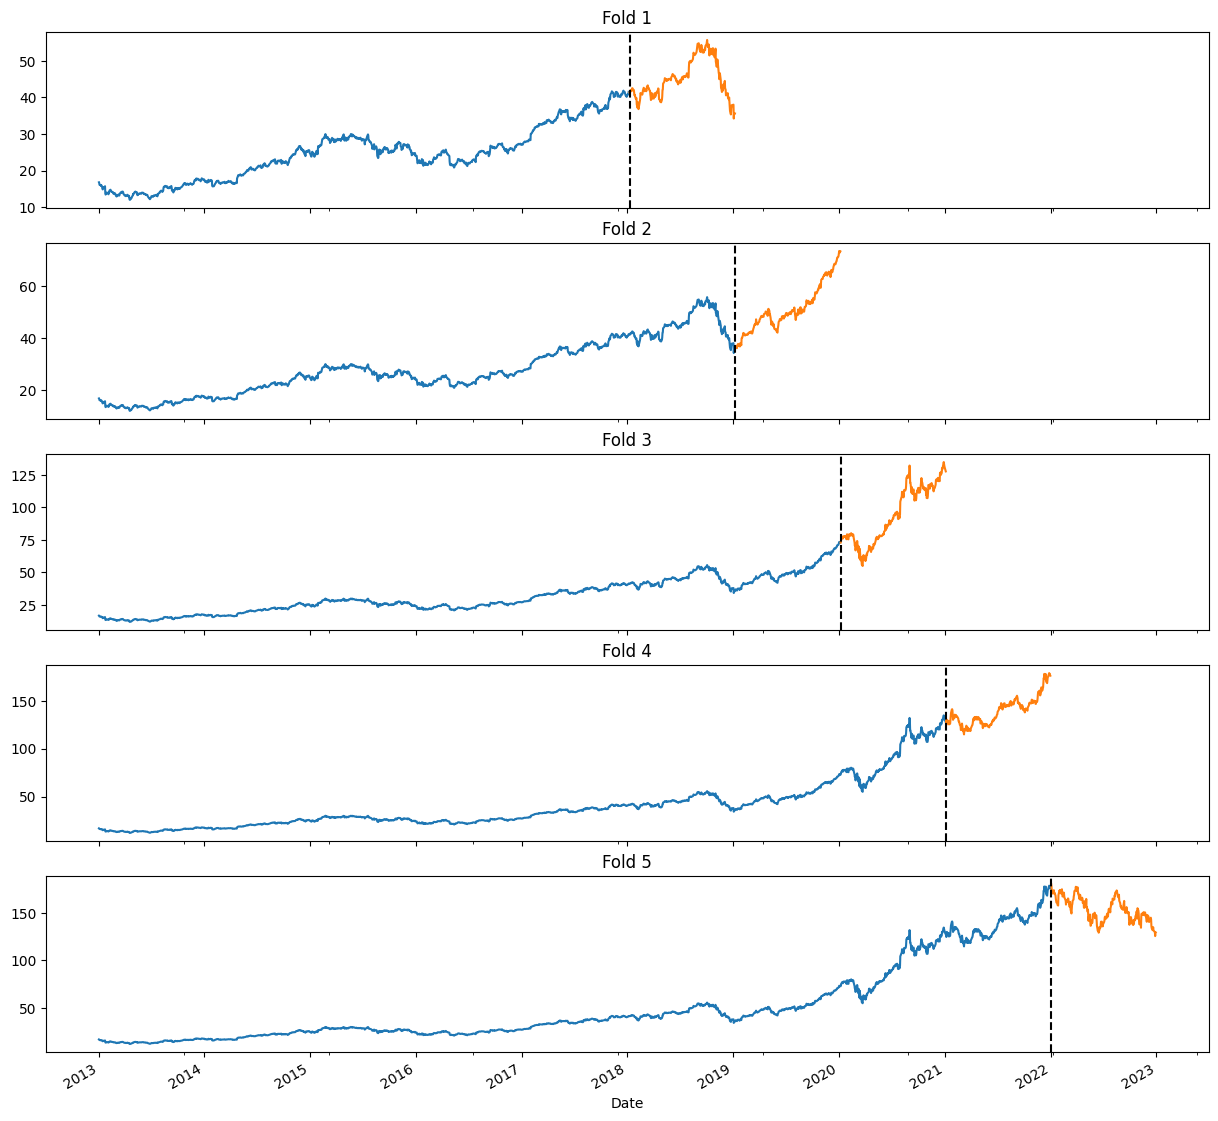

In [5]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)


fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
fold = 0

for train_idx, val_idx in tscv.split(temp_df.copy()):
    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]

    train["Close"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    test["Close"].plot(ax=axs[fold], label='Val Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

# Model

## test raw performance


In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.random.seed(42)

In [7]:
X_train = train.copy().drop(columns=['Close+1'])
Y_train = train[['Close+1']]
X_test = test.copy().drop(columns=['Close+1'])
Y_test = test[['Close+1']]

In [8]:
svr = SVR()
svr.fit(X_train,Y_train)
Y_pred =  svr.predict(X_test)
mse = (mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse,rmse}")

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: (13746.44652201879, 117.24524093548015)


## scale

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X = temp_df.copy().drop(columns=['Close+1'])
X_scaled = scaler.fit_transform(X)

y = temp_df[['Close+1']]

## fine tune

In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning,DataConversionWarning

# Filter out DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [11]:
from sklearn.model_selection import  GridSearchCV

# param_grid = {
#     'C': [0.1],
#     'epsilon': [0.1],
#     'kernel': ['linear']
# }
param_grid={
    'C':[0.0001,0.001,0.01,0.1,1,10, 100], 
    'kernel': ['linear','rbf','poly'],
    'max_iter': [1000],
    'gamma':[0.0001,0.001,0.01,0.1,1,10, 100], 
    'degree':[1,2,3,4,5],
     'max_iter': [1000]
}



# Define the number of splits for time series cross-validation
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

# Create the SVR model
svr = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_search.fit(X_scaled, y)

# Print the best parameter combination and the corresponding mean squared error
print("Best Parameters: ", grid_search.best_params_)
print("Best Mean Squared Error: ", (-grid_search.best_score_))

Best Parameters:  {'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly', 'max_iter': 1000}
Best Mean Squared Error:  3.9676369573369796


In [12]:
scores = grid_search.cv_results_
mean_scores = scores['mean_test_score']
params = scores['params']

# Sort the scores and parameters based on the mean scores in descending order
sorted_indices = np.argsort(mean_scores)[::-1]
sorted_mean_scores = mean_scores[sorted_indices]
sorted_params = [params[i] for i in sorted_indices]


# Print the sorted mean scores and corresponding parameters
for mean_score, param in zip(sorted_mean_scores, sorted_params):
    print(mean_score, '----', param)
    # if param['kernel'] == 'linear' and param['C'] == 1.0 and param['gamma'] == 0.001:
      
    #     print(mean_score, '----', param)


-3.9676369573369796 ---- {'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly', 'max_iter': 1000}
-4.032748086571239 ---- {'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 1000}
-4.444092735994961 ---- {'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 2, 'gamma': 100, 'kernel': 'linear', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
-4.448127107976333 ---- {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1000}
-4.4481271079

4.5695229918665605
6.912594525502242
0.4723259482440698
0.15777432963276541
0.26975390318705866
1.066752746238776
0.7287589259239741
7.285965514581728
6.293523317065085
16.336209048665253


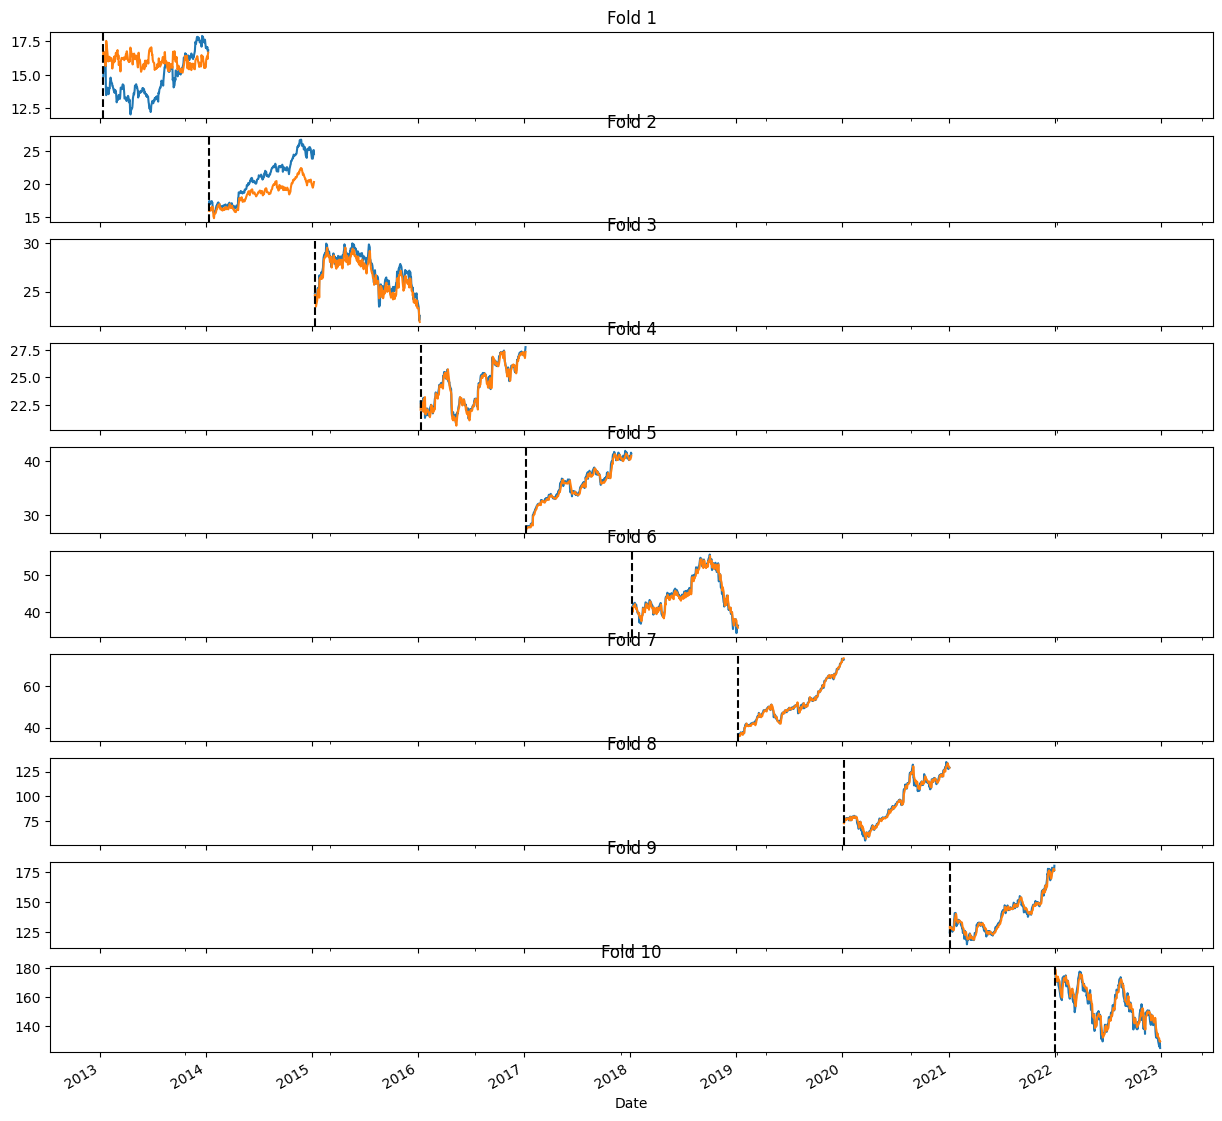

44.09318125090751


In [17]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=10, test_size=test_size, gap=0)


fig, axs = plt.subplots(10, 1, figsize=(15, 15), sharex=True)
fold = 0

mean_val = 0
for train_idx, val_idx in tscv.split(temp_df.copy()):

    svr =SVR(C=0.01, degree= 1, kernel='poly', gamma= 100, max_iter= 1000)
    #'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly', 'max_iter': 1000
    #{'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly', 'max_iter': 1000}
    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]
    X_train = train.copy().drop(columns=['Close+1'])

    scaler_cv = StandardScaler()
    scaler_cv.fit(X_train)
    x_train_scaled = scaler.transform(X_train)
    y_train = train[['Close+1']]
    X_test = test.copy().drop(columns=['Close+1'])
    X_test_scaled = scaler.transform(X_test)

    y_test = test[['Close+1']]
    
    svr.fit(x_train_scaled, y_train)

    y_pred = svr.predict(X_test_scaled)

    result = test.copy()
    result['pred'] = y_pred
    
    result["Close+1"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    result["pred"].plot(ax=axs[fold], label='Val Set')
    print(mean_squared_error(y_pred, y_test))
    mean_val+= mean_squared_error(y_pred, y_test)
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()
print(mean_val)

In [21]:
test_last = test_last.dropna()

svr =SVR(C=1, kernel= 'linear', max_iter= 5000)
X_train = temp_df.copy().drop(columns=['Close+1'])
y_train = temp_df[['Close+1']]
#scale train
final_scaler = StandardScaler()
final_scaler.fit(X_train)
X_train_scaled = final_scaler.transform(X_train)
#scale test
X_test_last = test_last.copy().drop(columns=['Close+1'])
y_test_last = test_last[['Close+1']]

X_test_last_scale = final_scaler.transform(X_test_last)

svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_last_scale)


df_plot = y_test_last.copy()
df_plot['pred'] = y_pred




In [22]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test_last))
mape = np.abs((df_plot['pred']-df_plot['Close+1'])/df_plot['Close+1'])
mape = (mape.mean())
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 2.110882224388553
MAPE: 0.010852824550411066


<Axes: xlabel='Date'>

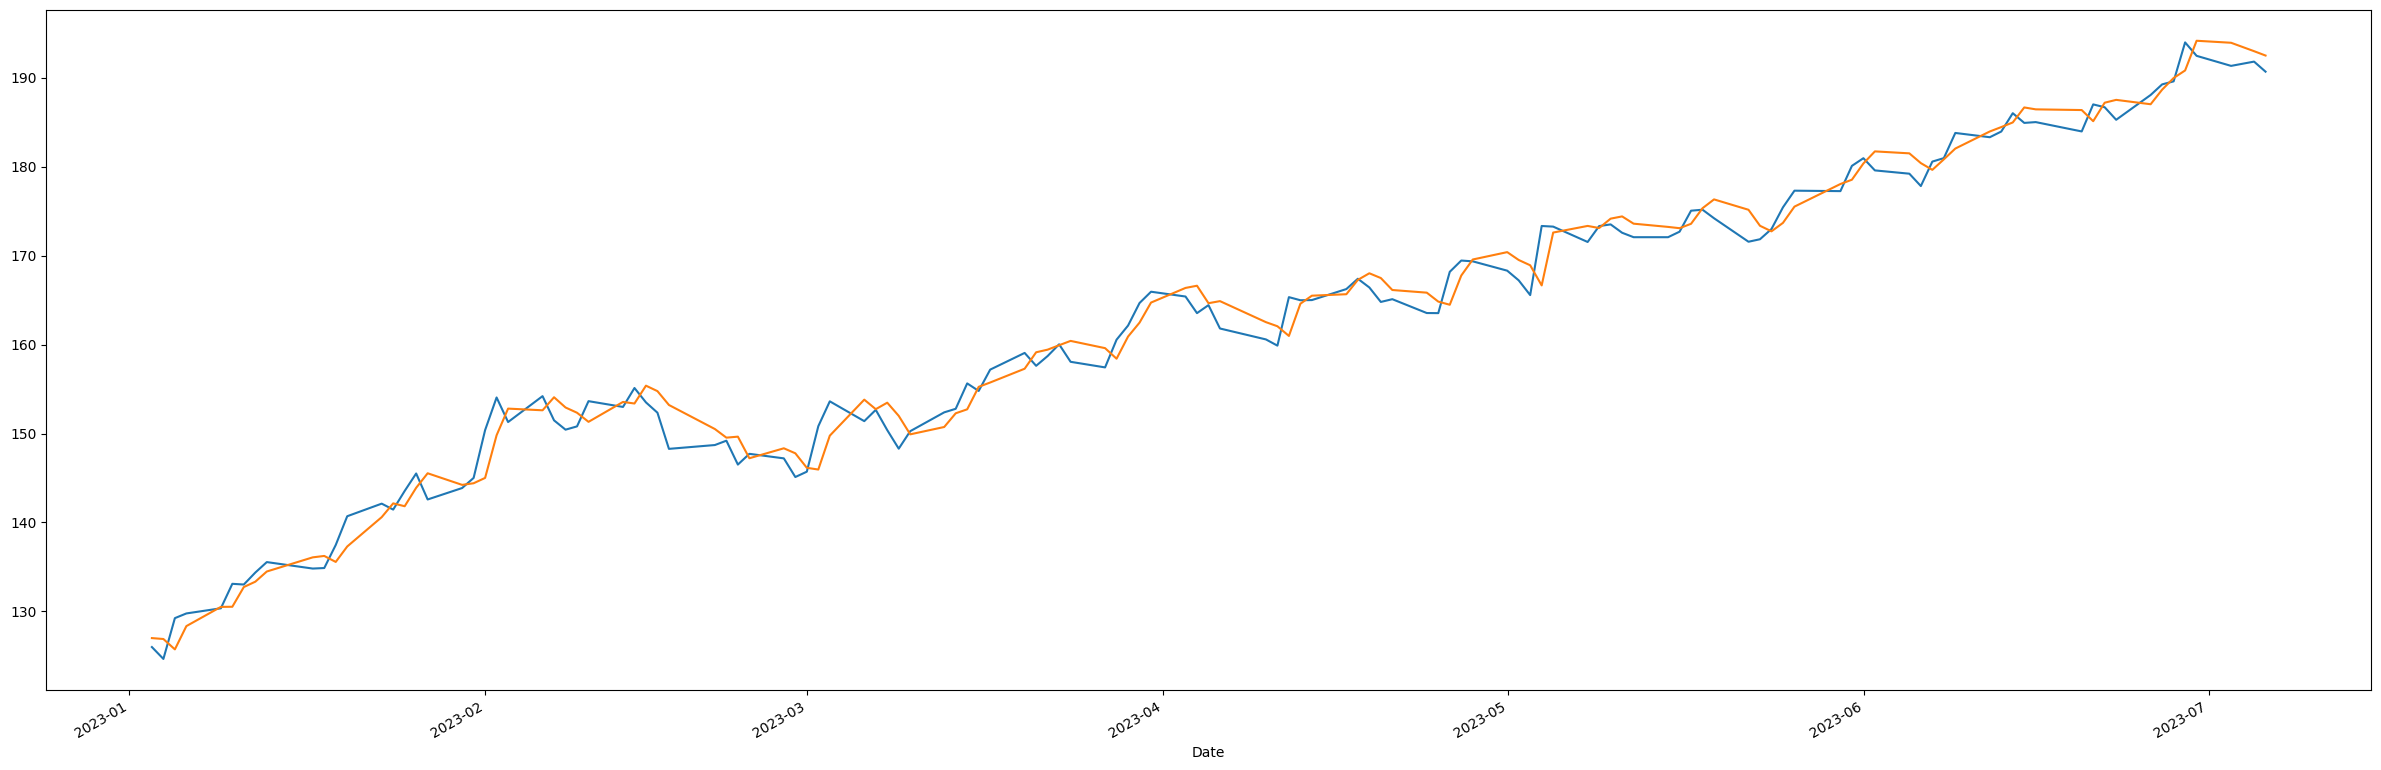

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
df_plot['Close+1'].plot(ax=ax, label='actual')
df_plot['pred'].plot(ax=ax, label='predict')

